In [20]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cosmic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
train_file = "../data/smsspamcollection/SMSSpamCollection"

df_train = pd.read_csv(train_file, sep="\t", header=None, names=["label", "text"])
l_train = len(df_train)
print("Length of training data: %d"%(l_train))


Length of training data: 1000


In [22]:
df_train.head(10)

label                                               text
0  positive                           Wow... Loved this place.
1  negative                                 Crust is not good.
2  negative          Not tasty and the texture was just nasty.
3  positive  Stopped by during the late May bank holiday of...
4  positive  The selection on the menu was great and so wer...
5  negative     Now I am getting angry and I want my damn pho.
6  negative              Honeslty it didn't taste THAT fresh.)
7  negative  The potatoes were like rubber and you could te...
8  positive                          The fries were great too.
9  positive                                     A great touch.

In [23]:
df_train.text = df_train.text.str.lower()
df_train.label = df_train.label.str.lower()

In [24]:
df_train.head(10)

label                                               text
0  positive                           wow... loved this place.
1  negative                                 crust is not good.
2  negative          not tasty and the texture was just nasty.
3  positive  stopped by during the late may bank holiday of...
4  positive  the selection on the menu was great and so wer...
5  negative     now i am getting angry and i want my damn pho.
6  negative              honeslty it didn't taste that fresh.)
7  negative  the potatoes were like rubber and you could te...
8  positive                          the fries were great too.
9  positive                                     a great touch.

In [25]:
null_check = df_train.isna().sum()
print("Null check on training data:")
print(null_check)


Null check on training data:
label    0
text     0
dtype: int64


In [26]:
print("Original data:")
df_train.head(5)

Original data:


label                                               text
0  positive                           wow... loved this place.
1  negative                                 crust is not good.
2  negative          not tasty and the texture was just nasty.
3  positive  stopped by during the late may bank holiday of...
4  positive  the selection on the menu was great and so wer...

In [27]:
df_train.fillna(-1, inplace=True)
print("New data (after filling NaN by -1):")
df_train.head(5)

New data (after filling NaN by -1):


label                                               text
0  positive                           wow... loved this place.
1  negative                                 crust is not good.
2  negative          not tasty and the texture was just nasty.
3  positive  stopped by during the late may bank holiday of...
4  positive  the selection on the menu was great and so wer...

In [28]:
print("Label distribution of training data:")
print((df_train.label.value_counts()/l_train))

Label distribution of training data:
negative    0.5
positive    0.5
Name: label, dtype: float64


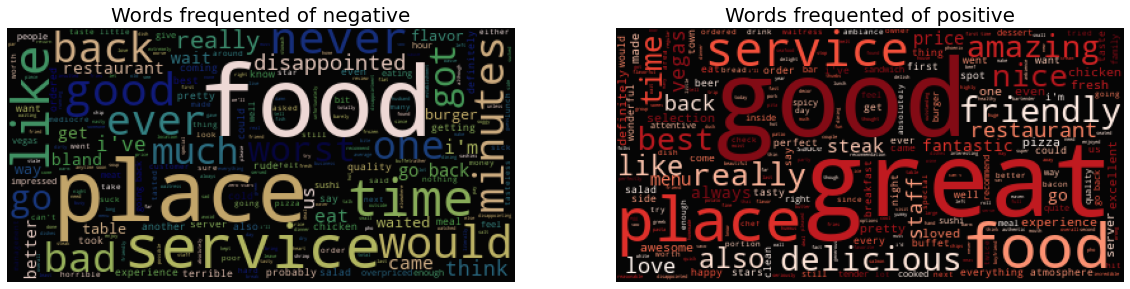

In [29]:
%matplotlib inline

dataset = df_train
eng_stopwords = set(stopwords.words("english"))

plt.figure(figsize=(20,20))
plt.subplot(121)
sub_text=dataset[dataset.label=="negative"].text.values
subwc= WordCloud(background_color="black",max_words=2000,stopwords=eng_stopwords)
subwc.generate(" ".join(sub_text))
plt.axis("off")
plt.title("Words frequented of negative", fontsize=20)
plt.imshow(subwc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

plt.subplot(122)
non_text=dataset[dataset.label=="positive"].text.values
nonwc= WordCloud(background_color="black",max_words=2000,stopwords=eng_stopwords)
nonwc.generate(" ".join(non_text))
plt.axis("off")
plt.title("Words frequented of positive", fontsize=20)
plt.imshow(nonwc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)

In [30]:
from collections import Counter
c_sub = Counter()
for sent in sub_text:
    c_sub.update(sent.split())
    
c_non = Counter()
for sent in non_text:
    c_non.update(sent.split())


In [31]:
inter_words = set(c_non).intersection(set(c_sub))
inter_words.difference_update(eng_stopwords)
print("Common words use in both: %d"%(len(inter_words)))
inter_words

Common words use in both: 463


{'!',
 '&',
 ',',
 '-',
 '2',
 '3',
 '4',
 '40',
 '5',
 '8',
 'absolutely',
 'again!',
 'again.',
 'all,',
 'almost',
 'also',
 'always',
 'amazing',
 'amazing,',
 'ambiance',
 'amount',
 'another',
 'anyway,',
 'area',
 'around',
 'ask',
 'ate',
 'atmosphere.',
 'attentive.',
 'authentic',
 'away',
 'bachi',
 'back',
 'back!',
 'back.',
 'bakery',
 'bar',
 'bar.',
 'bars',
 'bathroom',
 'bathrooms',
 'bay',
 'beat',
 'become',
 'beef',
 'beer',
 'believe',
 'best',
 'better',
 'better.',
 'beyond',
 'big',
 'bill',
 'bit',
 'black',
 'breakfast',
 'bring',
 'brought',
 'brunch',
 'buffet',
 'burger',
 'burgers',
 'came',
 "can't",
 'cannot',
 'care',
 'cashier',
 'char',
 'check',
 'checked',
 'cheese',
 'chicken',
 'chips',
 'clean',
 'close',
 'cold,',
 'combination',
 'come',
 'coming',
 'complain',
 'completely',
 'considering',
 'cooked',
 'could',
 'couple',
 'course',
 'cow',
 'crazy',
 'cream',
 'curry',
 'customer',
 'cut',
 'damn',
 'day',
 'day.',
 'deal',
 'dealing',
 'dec

In [32]:
sus_wd = []
for wd in inter_words:
    if c_sub[wd] >= c_non[wd]*3:
        sus_wd.append(wd)
sus_wd

['soon.',
 'talk',
 'fried',
 'extremely',
 'outside',
 'getting',
 'around',
 'impressed',
 'wait',
 'coming',
 'all,',
 'bring',
 'up.',
 'here!',
 'piece',
 'felt',
 'people',
 'better',
 'fish',
 'think',
 'would',
 'lot',
 'there.',
 'much',
 'done',
 'see',
 'gave',
 'bit',
 'waiter',
 'nothing',
 'soon',
 'another',
 'stars.',
 'never',
 'give',
 'damn',
 'pay',
 'husband',
 'eating',
 'tasted',
 'someone',
 'times',
 'take',
 'kept',
 'running',
 'said',
 'got',
 'least',
 'worst',
 '40',
 'table']

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
traindev = df_train[["text","label"]].sample(frac=1,random_state=1).reset_index(drop=True)
#train, dev, test = np.split(traindev, [int(.6*len(df)), int(.8*len(df))])
train, dev = train_test_split(traindev, test_size=0.3)
train = train.reset_index(drop=True)
dev = dev.reset_index(drop=True)

In [34]:
train.to_csv("../data/smsspamcollection/train.csv", index=False)
dev.to_csv("../data/smsspamcollection/test.csv", index=False)

In [35]:
dev.head(10)

text     label
0      it's a great place and i highly recommend it.  positive
1  kids pizza is always a hit too with lots of gr...  positive
2  from what my dinner companions told me...every...  positive
3                  the worst was the salmon sashimi.  negative
4                               very friendly staff.  positive
5  although i very much liked the look and sound ...  negative
6              honeslty it didn't taste that fresh.)  negative
7                   seriously killer hot chai latte.  positive
8  after the disappointing dinner we went elsewhe...  negative
9  the menu is always changing, food quality is g...  negative

In [36]:
def pieplt(data):
    print("Print len of data: %d"%len(data))
    labels = data["label"].value_counts()
    plt.figure(figsize=(10,10))
    labels.plot.pie(autopct='%.2f')

Print len of data: 700


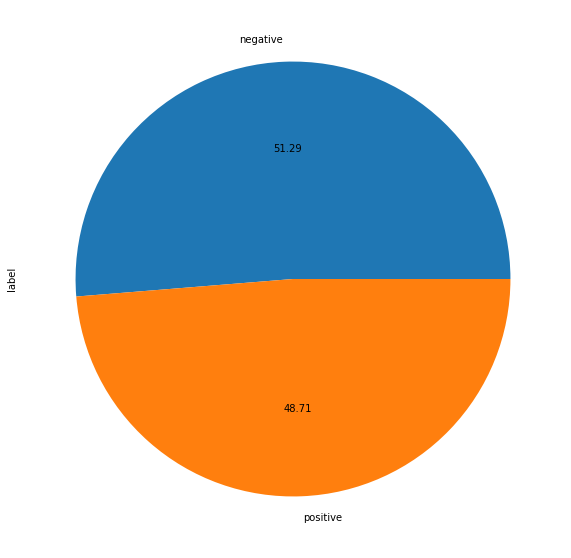

In [37]:
pieplt(train)

Print len of data: 300


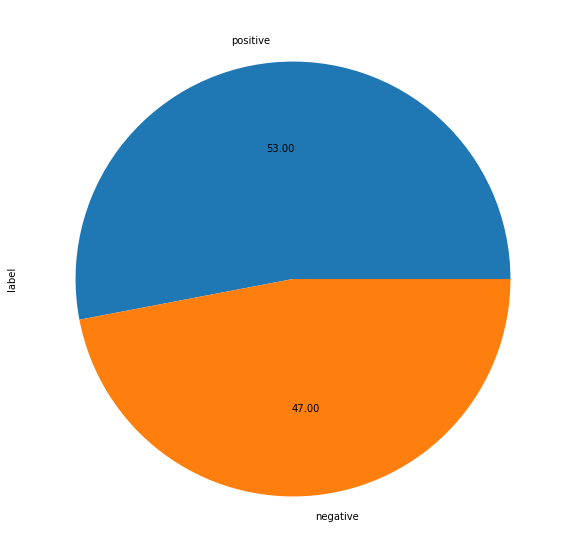

In [38]:
pieplt(dev)